In [1]:
# Import standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat file drug200.csv menjadi pandas dataframe
dataframe = pd.read_csv('drug200.csv')

# Menampilkan 5 baris pertama dari dataframe
dataframe.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
# Menampilkan informasi dari dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# Import LabelEncoder dari module sklearn
from sklearn.preprocessing import LabelEncoder

# Menyalin / copy dataframe agar dataframe awal tetap utuh
dataframe_int = dataframe.copy()

# Membuat objek/instance yang bernama encoder
encoder = LabelEncoder()

# Membuat list dari nama kolom data kategori
categorical_data = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Mengubah setiap data kategori menjadi numerik dengan encoder
for kolom in categorical_data:
    dataframe_int[kolom] = encoder.fit_transform(dataframe[kolom])
    
# Sekarang data sudah berupa angka sepenuhnya
dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [4]:
for kolom in categorical_data:
    print(kolom,dataframe_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [5]:
for kolom in categorical_data:
    print(kolom, dataframe[kolom].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
# Menampilkan matrix korelasi antar kolom
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


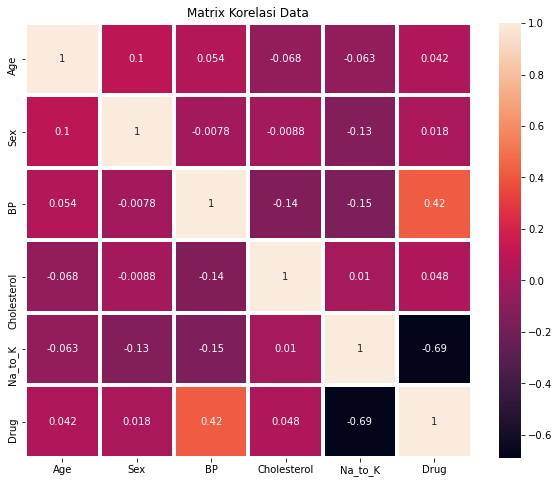

In [7]:
plt.figure(figsize=(10, 8))
plt.title('Matrix Korelasi Data')
sns.heatmap(dataframe_int.corr(), annot=True, linewidths=3)
plt.show()

In [8]:
def distribusi() :
    fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
    #figsize=(12,8) it means  1200x800 pixel
    plt.suptitle('Distribusi', fontsize=24)
    
    def kolom_generator():
        for kolom in dataframe_int:
            yield kolom
    kolom = kolom_generator()
    
    for i in range(0,2):
        for j in range(0,3):
            k = next(kolom)
            dataframe_int[k].plot(kind='hist', ax=axes[i,j])
            axes[i,j].set_title(k)
    plt.show()

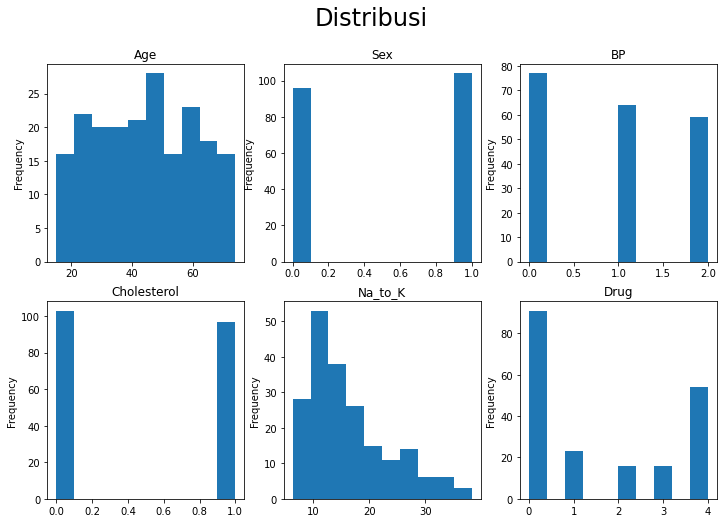

In [9]:
distribusi()

In [10]:
# Memisahkan dataframe awal menajdi data dan label
data = dataframe_int.drop('Drug', axis=1)
label = dataframe_int['Drug']

# Memisahkan dataframe menjadi data latihan dan data tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

# Print dataframe.shape untuk memngetahui bentuk dataframe
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [11]:
# import linear SVC model dari sklearn
from sklearn.svm import SVC

# Membuat objek dengan nama "model" dengan memanggil SVC ()
model = SVC(gamma='scale')

In [12]:
# melatih model dengan data latihan
model.fit(x_train, y_train)

SVC()

In [13]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf' ,max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

SVC()

In [14]:
# Membuat prediksi terhadap data tes
prediction = model.predict(x_test)

In [15]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
model_acc = 100*model.score(x_test, y_test)
print('SVM Predictions: \n', model.predict(x_test), '\n Accuracy:', model_acc, '%')

SVM Predictions: 
 [1 1 2 4 2 0 1 3 0 2 0 0 0 0 4 2 3 1 0 0 0 0 0 0 1 4 4 0 4 0 0 0 4 0 4 2 4
 0 4 0] 
 Accuracy: 100.0 %


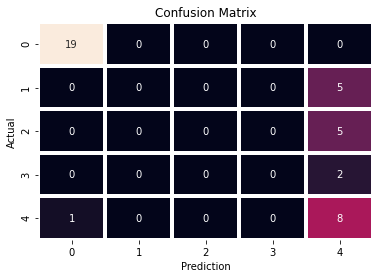

In [16]:
# Import confusion matrix dari sklearn
from sklearn.metrics import confusion_matrix

# Membuat fungsi untuk menampilkan confusion matrix dengan seaborn dan matplotlib
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True, linewidths=3, cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()
    
# Memanggil fungsi untuk menampilkan visualisasi confusion matrix
display_conf(y_test, prediction)

In [17]:
# Import r2_score dan classification_report dari sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

print(f'R2 Score : {r2_score(y_test,prediction)}')
print('Classification Report :')
print(classification_report(y_test,prediction))

R2 Score : 0.2153155282439141
Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.40      0.89      0.55         9

    accuracy                           0.68        40
   macro avg       0.27      0.38      0.31        40
weighted avg       0.54      0.68      0.59        40



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Menggunakan GridSearchCV untuk menemukan model dengan parameter terbaik
from sklearn.model_selection import GridSearchCV

# SVC  Model Hyperparameter
param_grid = {'C':[0.01,0.1,1,10,100],
             'gamma':[100,10,1,0,1,0.01]}

# Membuat model terbaik dari semua kemungkinan kombinasi param_grid
best_model = GridSearchCV(SVC(),param_grid, cv=5, refit=True)

# Melatih model terbaik
best_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})

In [19]:
# Model dengan parameter terbaik
best_model.best_estimator_

SVC(C=100, gamma=0.01)

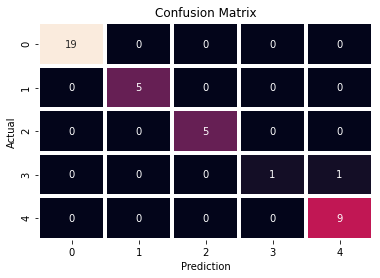

In [20]:
# Membuat prediksi dengan model yang telah ditingkatkan
prediction = best_model.predict(x_test)

# Menampilkan confusion matrix pada prediksi yang baru
display_conf(y_test, prediction)

In [21]:
print(f'R2 Score :{r2_score(y_test, prediction)}')
print('Classification Report : ')
print(classification_report(y_test, prediction))

R2 Score :0.9905459702198062
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.98      0.90      0.92        40
weighted avg       0.98      0.97      0.97        40



In [22]:
import pickle
# Menyimpan model menjadi file .pkl
with open('AI_DrugClassifier.pkl','wb') as file:
    pickle.dump(best_model,file)

In [23]:
# Memuat model dalam file .pkl
with open('AI_DrugClassifier.pkl','rb') as file:
    model = pickle.load(file)

In [24]:
model.best_estimator_

SVC(C=100, gamma=0.01)

## Demonstrasi Prediksi Model
import pickle

with open('AI_DrugClassifier.pkl','rb') as file:
    model = pickle.load(file)
    
def self_prediction():
    age = input('Age : ')
    sex = input('Sex : ')
    bp = input('BP : ')
    chol = input('Cholesterol : ')
    NatoK = input('Na_to_K : ')
    
    # data harus berbentuk (1,5) yaitu [[age,sex,bp,chol,NatoK]]
    print('\nPrediction')
    print('Patient consumed : ',encoder.inverse_transform(model.predict([[age,sex,bp,chol,NatoK]]))[0])
    
print(self_prediction())

In [26]:
!pip install -q pyngrok

In [27]:
!pip install -q streamlit

In [28]:
!pip install ipykernel

In [29]:
%%writefile coba.py
import pickle
import streamlit as st
# loading the trained model
pickle_in = open('AI_DrugClassifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
@st.cache()
# defining the function which will make the prediction using the data which the user inputs
def self_prediction(Age, Sex, BP, Cholesterol, Na_to_K):
    # Pre-processing user input
    if Sex == "MALE":
        Sex = 0
    else:
        Sex = 1
    if BP == "LOW":
        BP = 0
    elif BP == "NORMAL":
         BP = 1
    else :
        BP = 2
    if Cholesterol == "NORMAL":
        Cholesterol = 0
    else:
        Cholesterol = 1
   
    # Making predictions
    self_prediction = classifier.predict([[Age, Sex, BP, Cholesterol, Na_to_K]])
    
    if self_prediction == 0:
        pred = 'drugA'
    elif self_prediction == 1:
        pred = 'drugB'
    elif self_prediction == 2:
        pred = 'drugC'
    elif self_prediction == 3:
        pred = 'drugX'
    else :
        pred = 'DrugY'
    return pred
# this is the main function in which we define our webpage
def main():
    # front end elements of the web page
        html_temp = """
        <div style ="background-color:yellow;padding:13px">
        <h1 style ="color:black;text-align:center;">Prediksi Narkoba (PN App)</h1>
        </div>
        """
    # display the front end aspect
        st.markdown(html_temp, unsafe_allow_html = True)
    # following lines create boxes in which user can enter data required to make prediction
        Age = st.number_input("Masukan Umur",min_value=15, max_value=74, value=15, step=1)
        Sex = st.selectbox('Gender',("MALE","FEMALE"))
        BP = st.selectbox('BP Status',("LOW","NORMAL","HIGH"))
        Cholesterol = st.selectbox('Cholesterol',("NORMAL","HIGH"))
        Na_to_K = st.number_input("Masukan NatoK",min_value=6, max_value=38, value=6, step=1)
        result =""
    # when 'Predict' is clicked, make the prediction and store it
        if st.button("Predict"):
            result = self_prediction(Age, Sex, BP, Cholesterol, Na_to_K)
            st.success('Jenis Narkoba {}'.format(result))
            print(Na_to_K)
if __name__=='__main__':
    main()

Overwriting coba.py
